# MLP Classifier using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm Multi-Layered Perceptron as a Classifier algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis.

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

Using TensorFlow backend.
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarn

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset,position):
    dataset.iloc[:,position:] = dataset.iloc[:,position:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset,4)
display(dataset)
display(dataset.shape)

Fingerprint ID  coordinate_X  coordinate_Y      zone  f0:5c:19:94:1a:40  \
0               265           1.0           3.0  Personal              -62.0   
1               266           1.0           3.0  Personal              -62.0   
2               267           1.0           3.0  Personal              -63.0   
3               268           1.0           3.0  Personal              -63.0   
4               269           1.0           3.0  Personal              -63.0   
..              ...           ...           ...       ...                ...   
745            1022           2.0           3.0  Personal                NaN   
746            1023           2.0           3.0  Personal                NaN   
747            1024           2.0           3.0  Personal                NaN   
748            1025           2.0           3.0  Personal                NaN   
749            1026           2.0           3.0  Personal                NaN   

     f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  34:fc:b9:18:e4:c1  \
0                -65.0              -63.0              -76.0   
1                -61.0              -62.0              -77.0   
2                -62.0              -62.0                NaN   
3                -61.0              -63.0                NaN   
4                -61.0              -63.0              -76.0   
..                 ...                ...                ...   
745                NaN                NaN                NaN   
746                NaN                NaN                NaN   
747                NaN                NaN                NaN   
748                NaN                NaN                NaN   
749                NaN                NaN                NaN   

     34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  ...  10:7b:44:eb:73:98  \
0                -78.0              -79.0  ...                NaN   
1                -78.0              -78.0  ...                NaN   
2                  NaN                NaN  ...                NaN   
3                  NaN                NaN  ...                NaN   
4                -78.0              -78.0  ...                NaN   
..                 ...                ...  ...                ...   
745                NaN                NaN  ...                NaN   
746                NaN                NaN  ...                NaN   
747                NaN                NaN  ...                NaN   
748                NaN                NaN  ...                NaN   
749                NaN                NaN  ...                NaN   

     f0:5c:19:94:19:f2  f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
745              -90.0              -89.0                NaN   
746              -88.0                NaN                NaN   
747              -89.0              -90.0                NaN   
748              -91.0              -89.0                NaN   
749              -91.0              -92.0                NaN   

     34:fc:b9:18:e7:22  34:fc:b9:18:e7:20  f0:5c:19:94:19:f1  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
745                NaN                NaN              -90.0   
746                NaN                NaN              -90.0   
747                NaN                NaN              -90.0   
748                NaN               

(750, 37)

### Dataset Overall Info

In [5]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [6]:
display(dataset.describe().transpose())

count        mean         std    min     25%    50%  \
Fingerprint ID     750.0  639.980000  217.460567  265.0  452.25  639.5   
coordinate_X       750.0    0.000000    1.415157   -2.0   -1.00    0.0   
coordinate_Y       750.0    1.000000    1.415157   -1.0    0.00    1.0   
f0:5c:19:94:1a:40  630.0  -65.284127    3.983300  -76.0  -68.00  -65.0   
f0:5c:19:94:1a:41  634.0  -63.529968    3.464086  -71.0  -66.00  -64.0   
f0:5c:19:94:1a:42  635.0  -64.628346    3.965205  -76.0  -68.00  -64.0   
34:fc:b9:18:e4:c1  189.0  -78.380952    3.702049  -86.0  -81.00  -78.0   
34:fc:b9:18:e4:c0  145.0  -80.255172    4.808527  -92.0  -84.00  -79.0   
34:fc:b9:18:e4:c2  178.0  -81.410112    4.828740  -92.0  -86.00  -81.0   
f0:5c:19:94:1a:50  664.0  -78.664157    3.975435  -89.0  -81.25  -79.0   
f0:5c:19:94:1a:51  699.0  -79.021459    4.066545  -87.0  -82.00  -80.0   
f0:5c:19:94:1a:52  738.0  -79.521680    4.434378  -90.0  -82.00  -80.0   
4c:ed:fb:5a:5c:0c  712.0  -89.289326    3.266072  -96.0  -91.25  -90.0   
4c:ed:fb:5a:5c:08  682.0  -80.931085    4.109686  -96.0  -83.00  -81.0   
f0:5c:19:94:19:e1  343.0  -85.886297    2.726610  -91.0  -88.00  -86.0   
f0:5c:19:94:19:e2  280.0  -87.542857    2.552310  -93.0  -89.00  -88.0   
34:fc:b9:18:e8:21  239.0  -75.732218    3.742141  -86.0  -78.00  -75.0   
34:fc:b9:18:e8:22  228.0  -79.763158    4.600905  -93.0  -83.00  -79.0   
34:fc:b9:18:e8:20  222.0  -79.364865    4.135404  -94.0  -82.00  -78.0   
f0:5c:19:94:19:e0  189.0  -87.354497    2.763024  -93.0  -89.00  -88.0   
34:fc:b9:18:e4:d2  426.0  -86.833333    3.072905  -92.0  -89.00  -87.0   
48:ee:0c:ed:93:b5  492.0  -92.573171    1.760835  -98.0  -94.00  -93.0   
34:fc:b9:18:e4:d0  354.0  -86.290960    3.053364  -92.0  -88.00  -87.0   
34:fc:b9:18:e4:d1   85.0  -82.094118    2.684273  -87.0  -84.00  -81.0   
34:fc:b9:18:e8:30   71.0  -87.197183    1.141674  -90.0  -88.00  -87.0   
34:fc:b9:18:e8:32  105.0  -87.933333    1.442931  -91.0  -89.00  -88.0   
10:7b:44:eb:73:98    1.0  -94.000000         NaN  -94.0  -94.00  -94.0   
f0:5c:19:94:19:f2   66.0  -92.106061    2.560822  -96.0  -94.00  -93.0   
f0:5c:19:94:19:f0   27.0  -90.703704    1.996436  -95.0  -91.50  -90.0   
34:fc:b9:18:e7:21   20.0  -87.000000    2.152110  -90.0  -89.00  -87.5   
34:fc:b9:18:e7:22   10.0  -88.700000    2.311805  -91.0  -90.00  -89.5   
34:fc:b9:18:e7:20   17.0  -88.941176    2.164214  -92.0  -91.00  -90.0   
f0:5c:19:94:19:f1   25.0  -89.440000    0.820569  -91.0  -90.00  -90.0   
E1:E9:C3:D9:09:C3  742.0  -85.357143    7.520764 -101.0  -90.00  -86.5   
FF:20:88:3C:97:E7  550.0  -82.776364    7.793965  -97.0  -88.00  -84.0   
CA:E0:7D:11:26:B3  750.0  -85.388000    8.292073 -100.0  -92.00  -86.0   

                      75%     max  
Fingerprint ID     826.75  1026.0  
coordinate_X         1.00     2.0  
coordinate_Y         2.00     3.0  
f0:5c:19:94:1a:40  -62.00   -56.0  
f0:5c:19:94:1a:41  -62.00   -48.0  
f0:5c:19:94:1a:42  -61.00   -56.0  
34:fc:b9:18:e4:c1  -76.00   -70.0  
34:fc:b9:18:e4:c0  -77.00   -71.0  
34:fc:b9:18:e4:c2  -78.00   -70.0  
f0:5c:19:94:1a:50  -76.00   -69.0  
f0:5c:19:94:1a:51  -76.00   -69.0  
f0:5c:19:94:1a:52  -77.00   -69.0  
4c:ed:fb:5a:5c:0c  -88.00   -81.0  
4c:ed:fb:5a:5c:08  -78.00   -71.0  
f0:5c:19:94:19:e1  -84.00   -76.0  
f0:5c:19:94:19:e2  -86.00   -78.0  
34:fc:b9:18:e8:21  -73.00   -69.0  
34:fc:b9:18:e8:22  -77.00   -70.0  
34:fc:b9:18:e8:20  -77.00   -71.0  
f0:5c:19:94:19:e0  -85.00   -79.0  
34:fc:b9:18:e4:d2  -86.00   -77.0  
48:ee:0c:ed:93:b5  -91.00   -88.0  
34:fc:b9:18:e4:d0  -85.00   -77.0  
34:fc:b9:18:e4:d1  -80.00   -77.0  
34:fc:b9:18:e8:30  -86.00   -85.0  
34:fc:b9:18:e8:32  -87.00   -85.0  
10:7b:44:eb:73:98  -94.00   -94.0  
f0:5c:19:94:19:f2  -90.00   -88.0  
f0:5c:19:94:19:f0  -89.00   -88.0  
34:fc:b9:18:e7:21  -85.75   -82.0  
34:fc:b9:18:e7:22  -87.50   -84.0  
34:fc:b9:18:e7:20  -87.00   -85.0  
f0:5c:19:94:19:f1  -89.00   -88.0  
E1:E9:C3:D9:09:C3  -83.00   -61.0  
FF:20:88:3C:97:E7  -

### % of Missing Values

In [7]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    total_amount = dataset.count() + dataset.isnull().sum()
    total_pd = pd.DataFrame(total_amount,columns=['Samples'])
    missing_percentage = (dataset.isnull().sum() / (dataset.count() + dataset.isnull().sum()))
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(total_pd).join(missing_percentage_dataset)
    display(missing_dataset)
    return missing_dataset

In [8]:
missing_dataset = compute_missing_values(dataset)

Missing Values  Samples  % of Missing Values
Fingerprint ID                  0      750             0.000000
coordinate_X                    0      750             0.000000
coordinate_Y                    0      750             0.000000
zone                            0      750             0.000000
f0:5c:19:94:1a:40             120      750             0.160000
f0:5c:19:94:1a:41             116      750             0.154667
f0:5c:19:94:1a:42             115      750             0.153333
34:fc:b9:18:e4:c1             561      750             0.748000
34:fc:b9:18:e4:c0             605      750             0.806667
34:fc:b9:18:e4:c2             572      750             0.762667
f0:5c:19:94:1a:50              86      750             0.114667
f0:5c:19:94:1a:51              51      750             0.068000
f0:5c:19:94:1a:52              12      750             0.016000
4c:ed:fb:5a:5c:0c              38      750             0.050667
4c:ed:fb:5a:5c:08              68      750             0.090667
f0:5c:19:94:19:e1             407      750             0.542667
f0:5c:19:94:19:e2             470      750             0.626667
34:fc:b9:18:e8:21             511      750             0.681333
34:fc:b9:18:e8:22             522      750             0.696000
34:fc:b9:18:e8:20             528      750             0.704000
f0:5c:19:94:19:e0             561      750             0.748000
34:fc:b9:18:e4:d2             324      750             0.432000
48:ee:0c:ed:93:b5             258      750             0.344000
34:fc:b9:18:e4:d0             396      750             0.528000
34:fc:b9:18:e4:d1             665      750             0.886667
34:fc:b9:18:e8:30             679      750             0.905333
34:fc:b9:18:e8:32             645      750             0.860000
10:7b:44:eb:73:98             749      750             0.998667
f0:5c:19:94:19:f2             684      750             0.912000
f0:5c:19:94:19:f0             723      750             0.964000
34:fc:b9:18:e7:21             730      750             0.973333
34:fc:b9:18:e7:22             740      750             0.986667
34:fc:b9:18:e7:20             733      750             0.977333
f0:5c:19:94:19:f1             725      750             0.966667
E1:E9:C3:D9:09:C3               8      750             0.010667
FF:20:88:3C:97:E7             200      750             0.266667
CA:E0:7D:11:26:B3               0      750             0.000000

### Overall Histogram of dataset atributes

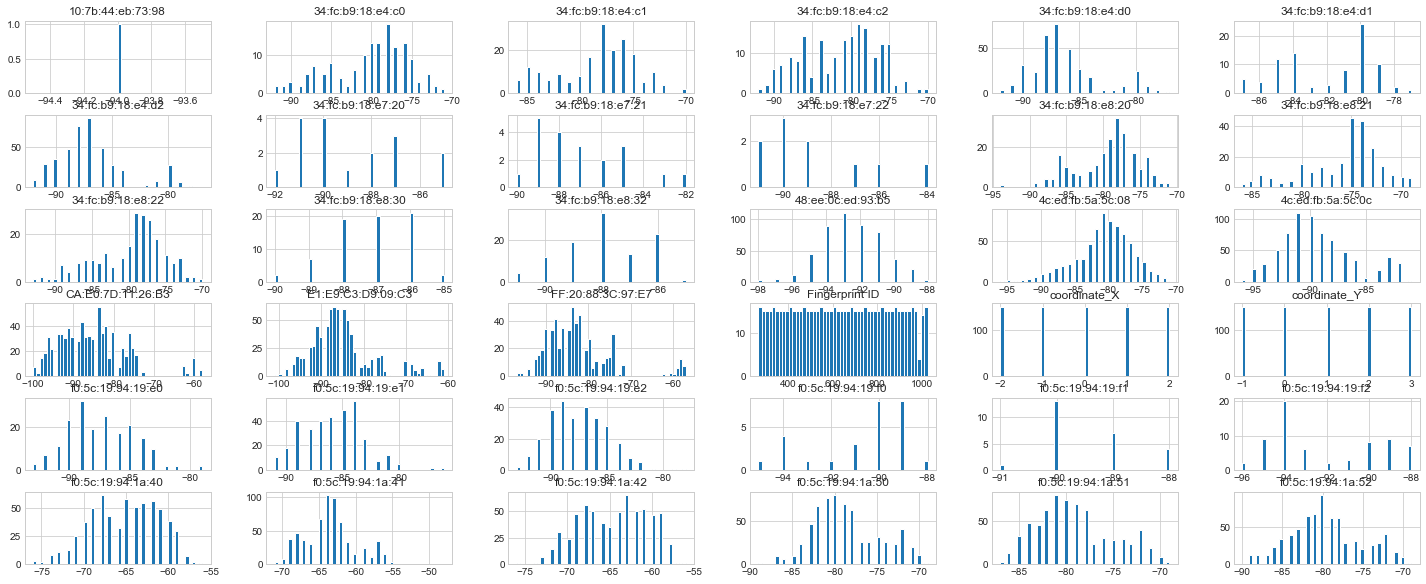

In [9]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Zone
Graphical display of the zones scanned in the experiment

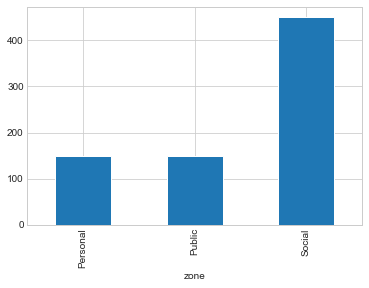

In [10]:
reference_points = dataset.groupby(['zone'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
0                -62.0              -65.0              -63.0   
1                -62.0              -61.0              -62.0   
2                -63.0              -62.0              -62.0   
3                -63.0              -61.0              -63.0   
4                -63.0              -61.0              -63.0   
..                 ...                ...                ...   
745                NaN                NaN                NaN   
746                NaN                NaN                NaN   
747                NaN                NaN                NaN   
748                NaN                NaN                NaN   
749                NaN                NaN                NaN   

     34:fc:b9:18:e4:c1  34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  \
0                -76.0              -78.0              -79.0   
1                -77.0              -78.0              -78.0   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                -76.0              -78.0              -78.0   
..                 ...                ...                ...   
745                NaN                NaN                NaN   
746                NaN                NaN                NaN   
747                NaN                NaN                NaN   
748                NaN                NaN                NaN   
749                NaN                NaN                NaN   

     f0:5c:19:94:1a:50  f0:5c:19:94:1a:51  f0:5c:19:94:1a:52  \
0                -80.0              -80.0              -80.0   
1                -80.0              -81.0              -80.0   
2                -80.0              -79.0              -80.0   
3                -81.0              -81.0              -81.0   
4                -80.0              -80.0              -81.0   
..                 ...                ...                ...   
745              -71.0              -73.0              -73.0   
746              -72.0              -74.0              -73.0   
747              -72.0              -73.0              -73.0   
748              -74.0              -72.0              -73.0   
749              -71.0              -72.0              -72.0   

     4c:ed:fb:5a:5c:0c  ...  34:fc:b9:18:e4:d1  34:fc:b9:18:e8:30  \
0                -89.0  ...                NaN                NaN   
1                -90.0  ...                NaN                NaN   
2                -90.0  ...                NaN                NaN   
3                -90.0  ...                NaN                NaN   
4                -90.0  ...                NaN                NaN   
..                 ...  ...                ...                ...   
745              -83.0  ...                NaN                NaN   
746              -83.0  ...              -86.0                NaN   
747              -83.0  ...                NaN                NaN   
748              -83.0  ...              -85.0                NaN   
749              -83.0  ...                NaN                NaN   

     34:fc:b9:18:e8:32  10:7b:44:eb:73:98  f0:5c:19:94:19:f2  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
745                NaN                NaN              -90.0   
746                NaN                NaN              -88.0   
747                NaN                NaN              -89.0   
748                NaN                NaN              -91.0   
749                NaN                NaN              -91.0   

     f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  34:fc:b9:18:e7:22  \
0                  NaN              

<BarContainer object of 30 artists>

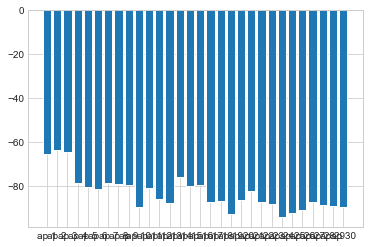

In [11]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.isupper() == True:
        first_beacon_index = list(dataset).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
display(dataset.iloc[:,4:first_beacon_index])
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

E1:E9:C3:D9:09:C3  FF:20:88:3C:97:E7  CA:E0:7D:11:26:B3
0                -86.0              -88.0                -96
1                -96.0              -88.0                -96
2                -94.0              -92.0                -98
3                -92.0              -89.0                -96
4                -96.0              -89.0                -93
..                 ...                ...                ...
745              -95.0              -84.0                -95
746              -94.0              -83.0                -92
747              -92.0              -84.0                -91
748              -93.0              -84.0                -93
749              -97.0              -82.0                -93

[750 rows x 3 columns]

<BarContainer object of 3 artists>

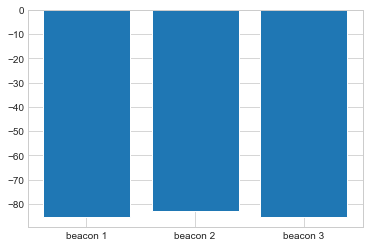

In [12]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,first_beacon_index:]
display(beacons)
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

### Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

#### Wifi Signal Strength

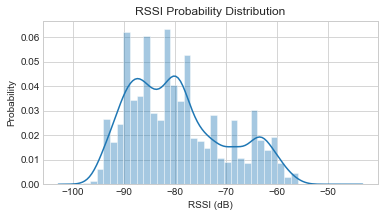

In [13]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
sns.distplot(dataset.iloc[:,4:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

#### Bluetooth Signal Strength

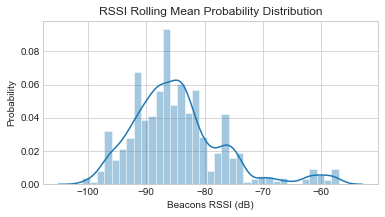

In [14]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [15]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [16]:
compute_correlations(dataset)

Fingerprint ID  coordinate_X  coordinate_Y  \
Fingerprint ID           1.000000      0.366251     -0.566946   
coordinate_X             0.366251      1.000000      0.000000   
coordinate_Y            -0.566946      0.000000      1.000000   
f0:5c:19:94:1a:40        0.032462      0.280135      0.053322   
f0:5c:19:94:1a:41        0.242338      0.416280     -0.071948   
f0:5c:19:94:1a:42        0.033822      0.287384      0.053766   
34:fc:b9:18:e4:c1       -0.139389      0.064912      0.137335   
34:fc:b9:18:e4:c0       -0.117810      0.171978      0.016277   
34:fc:b9:18:e4:c2       -0.001366      0.200114     -0.044580   
f0:5c:19:94:1a:50        0.508888      0.225635     -0.062025   
f0:5c:19:94:1a:51        0.396653      0.154204      0.016996   
f0:5c:19:94:1a:52        0.410779      0.175353     -0.006813   
4c:ed:fb:5a:5c:0c        0.387284      0.138658     -0.002532   
4c:ed:fb:5a:5c:08       -0.125609      0.083452      0.162620   
f0:5c:19:94:19:e1        0.225679      0.180819     -0.071232   
f0:5c:19:94:19:e2        0.258287      0.324229     -0.203365   
34:fc:b9:18:e8:21        0.095567     -0.436132     -0.045630   
34:fc:b9:18:e8:22       -0.184106     -0.325715      0.137012   
34:fc:b9:18:e8:20       -0.151016     -0.324171      0.126985   
f0:5c:19:94:19:e0        0.289709      0.255014     -0.267063   
34:fc:b9:18:e4:d2       -0.039181     -0.125951      0.157013   
48:ee:0c:ed:93:b5        0.102343      0.089620     -0.081692   
34:fc:b9:18:e4:d0       -0.214649     -0.117911      0.298540   
34:fc:b9:18:e4:d1       -0.641835     -0.577593     -0.093789   
34:fc:b9:18:e8:30       -0.434754     -0.307743      0.547200   
34:fc:b9:18:e8:32       -0.169819     -0.353095      0.298193   
10:7b:44:eb:73:98             NaN           NaN           NaN   
f0:5c:19:94:19:f2        0.748611           NaN      0.832861   
f0:5c:19:94:19:f0        0.837234           NaN      0.857329   
34:fc:b9:18:e7:21       -0.071316     -0.623570     -0.333712   
34:fc:b9:18:e7:22       -0.227020     -0.854697     -0.592749   
34:fc:b9:18:e7:20       -0.675707     -0.919701     -0.812240   
f0:5c:19:94:19:f1       -0.133456           NaN           NaN   
E1:E9:C3:D9:09:C3        0.109751     -0.558757     -0.425166   
FF:20:88:3C:97:E7       -0.202906     -0.413933      0.318924   
CA:E0:7D:11:26:B3        0.301147      0.148591     -0.666386   

                   f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
Fingerprint ID              0.032462           0.242338           0.033822   
coordinate_X                0.280135           0.416280           0.287384   
coordinate_Y                0.053322          -0.071948           0.053766   
f0:5c:19:94:1a:40           1.000000           0.588375           0.899034   
f0:5c:19:94:1a:41           0.588375           1.000000           0.617635   
f0:5c:19:94:1a:42           0.899034           0.617635           1.000000   
34:fc:b9:18:e4:c1          -0.118245           0.056372          -0.096208   
34:fc:b9:18:e4:c0          -0.239832          -0.085792          -0.213136   
34:fc:b9:18:e4:c2          -0.170579           0.000745          -0.180547   
f0:5c:19:94:1a:50           0.047614           0.185243           0.080835   
f0:5c:19:94:1a:51           0.041851           0.169981           0.076604   
f0:5c:19:94:1a:52           0.014849           0.206879           0.048076   
4c:ed:fb:5a:5c:0c           0.256296           0.305813           0.265746   
4c:ed:fb:5a:5c:08           0.048229          -0.075076           0.058237   
f0:5c:19:94:19:e1           0.109968           0.372364           0.165445   
f0:5c:19:94:19:e2           0.185223           0.354054           0.249712   
34:fc:b9:18:e8:21          -0.119467           0.091196          -0.072939   
34:fc:b9:18:e8:22          -0.167929          -0.060037          -0.104376   
34:fc:b9:18:e8:20          -0.078970          -0.048271          -0.006674   
f0:5c:19:94:19:e0           0.133278           0.2244

### Data cleaning
Fill in missing values and fix/remove outliers (Current approach is using the minimum global scanned value)

In [17]:
def compute_data_cleaning_with_local_minimum(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [18]:
def compute_data_cleaning_with_global_minimum(dataset):
    numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
    numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
    nan_filler_wifi = np.nanmin(numpy_arr_wifi)*1.010
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,first_beacon_index:] = dataset.iloc[:,first_beacon_index:].fillna(nan_filler_ble)
    dataset.iloc[:,4:first_beacon_index] = dataset.iloc[:,4:first_beacon_index].fillna(nan_filler_wifi)
    print("MINIMUM WIFI: "+ str(nan_filler_wifi))
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [19]:
compute_data_cleaning_with_global_minimum(dataset)
display(dataset)

MINIMUM WIFI: -98.98
MINIMUM BLE: -102.01


Fingerprint ID  coordinate_X  coordinate_Y      zone  f0:5c:19:94:1a:40  \
0               265           1.0           3.0  Personal             -62.00   
1               266           1.0           3.0  Personal             -62.00   
2               267           1.0           3.0  Personal             -63.00   
3               268           1.0           3.0  Personal             -63.00   
4               269           1.0           3.0  Personal             -63.00   
..              ...           ...           ...       ...                ...   
745            1022           2.0           3.0  Personal             -98.98   
746            1023           2.0           3.0  Personal             -98.98   
747            1024           2.0           3.0  Personal             -98.98   
748            1025           2.0           3.0  Personal             -98.98   
749            1026           2.0           3.0  Personal             -98.98   

     f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  34:fc:b9:18:e4:c1  \
0               -65.00             -63.00             -76.00   
1               -61.00             -62.00             -77.00   
2               -62.00             -62.00             -98.98   
3               -61.00             -63.00             -98.98   
4               -61.00             -63.00             -76.00   
..                 ...                ...                ...   
745             -98.98             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -98.98             -98.98             -98.98   
748             -98.98             -98.98             -98.98   
749             -98.98             -98.98             -98.98   

     34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  ...  10:7b:44:eb:73:98  \
0               -78.00             -79.00  ...             -98.98   
1               -78.00             -78.00  ...             -98.98   
2               -98.98             -98.98  ...             -98.98   
3               -98.98             -98.98  ...             -98.98   
4               -78.00             -78.00  ...             -98.98   
..                 ...                ...  ...                ...   
745             -98.98             -98.98  ...             -98.98   
746             -98.98             -98.98  ...             -98.98   
747             -98.98             -98.98  ...             -98.98   
748             -98.98             -98.98  ...             -98.98   
749             -98.98             -98.98  ...             -98.98   

     f0:5c:19:94:19:f2  f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  \
0               -98.98             -98.98             -98.98   
1               -98.98             -98.98             -98.98   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -98.98             -98.98             -98.98   
..                 ...                ...                ...   
745             -90.00             -89.00             -98.98   
746             -88.00             -98.98             -98.98   
747             -89.00             -90.00             -98.98   
748             -91.00             -89.00             -98.98   
749             -91.00             -92.00             -98.98   

     34:fc:b9:18:e7:22  34:fc:b9:18:e7:20  f0:5c:19:94:19:f1  \
0               -98.98             -98.98             -98.98   
1               -98.98             -98.98             -98.98   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -98.98             -98.98             -98.98   
..                 ...                ...                ...   
745             -98.98             -98.98             -90.00   
746             -98.98             -98.98             -90.00   
747             -98.98             -98.98             -90.00   
748             -98.98             -9

### Initialize Training Data
Training Data intialization for predictions purposes

In [20]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
0               -62.00             -65.00             -63.00   
1               -62.00             -61.00             -62.00   
2               -63.00             -62.00             -62.00   
3               -63.00             -61.00             -63.00   
4               -63.00             -61.00             -63.00   
..                 ...                ...                ...   
745             -98.98             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -98.98             -98.98             -98.98   
748             -98.98             -98.98             -98.98   
749             -98.98             -98.98             -98.98   

     34:fc:b9:18:e4:c1  34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  \
0               -76.00             -78.00             -79.00   
1               -77.00             -78.00             -78.00   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -76.00             -78.00             -78.00   
..                 ...                ...                ...   
745             -98.98             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -98.98             -98.98             -98.98   
748             -98.98             -98.98             -98.98   
749             -98.98             -98.98             -98.98   

     f0:5c:19:94:1a:50  f0:5c:19:94:1a:51  f0:5c:19:94:1a:52  \
0                -80.0              -80.0              -80.0   
1                -80.0              -81.0              -80.0   
2                -80.0              -79.0              -80.0   
3                -81.0              -81.0              -81.0   
4                -80.0              -80.0              -81.0   
..                 ...                ...                ...   
745              -71.0              -73.0              -73.0   
746              -72.0              -74.0              -73.0   
747              -72.0              -73.0              -73.0   
748              -74.0              -72.0              -73.0   
749              -71.0              -72.0              -72.0   

     4c:ed:fb:5a:5c:0c  ...  34:fc:b9:18:e4:d1  34:fc:b9:18:e8:30  \
0                -89.0  ...             -98.98             -98.98   
1                -90.0  ...             -98.98             -98.98   
2                -90.0  ...             -98.98             -98.98   
3                -90.0  ...             -98.98             -98.98   
4                -90.0  ...             -98.98             -98.98   
..                 ...  ...                ...                ...   
745              -83.0  ...             -98.98             -98.98   
746              -83.0  ...             -86.00             -98.98   
747              -83.0  ...             -98.98             -98.98   
748              -83.0  ...             -85.00             -98.98   
749              -83.0  ...             -98.98             -98.98   

     34:fc:b9:18:e8:32  10:7b:44:eb:73:98  f0:5c:19:94:19:f2  \
0               -98.98             -98.98             -98.98   
1               -98.98             -98.98             -98.98   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -98.98             -98.98             -98.98   
..                 ...                ...                ...   
745             -98.98             -98.98             -90.00   
746             -98.98             -98.98             -88.00   
747             -98.98             -98.98             -89.00   
748             -98.98             -98.98             -91.00   
749             -98.98             -98.98             -91.00   

     f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  34:fc:b9:18:e7:22  \
0               -98.98             -

(750, 30)

In [21]:
train_ble = dataset.iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

E1:E9:C3:D9:09:C3  FF:20:88:3C:97:E7  CA:E0:7D:11:26:B3
0                -86.0              -88.0                -96
1                -96.0              -88.0                -96
2                -94.0              -92.0                -98
3                -92.0              -89.0                -96
4                -96.0              -89.0                -93
..                 ...                ...                ...
745              -95.0              -84.0                -95
746              -94.0              -83.0                -92
747              -92.0              -84.0                -91
748              -93.0              -84.0                -93
749              -97.0              -82.0                -93

[750 rows x 3 columns]

(750, 3)

In [22]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
0               -62.00             -65.00             -63.00   
1               -62.00             -61.00             -62.00   
2               -63.00             -62.00             -62.00   
3               -63.00             -61.00             -63.00   
4               -63.00             -61.00             -63.00   
..                 ...                ...                ...   
745             -98.98             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -98.98             -98.98             -98.98   
748             -98.98             -98.98             -98.98   
749             -98.98             -98.98             -98.98   

     34:fc:b9:18:e4:c1  34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  \
0               -76.00             -78.00             -79.00   
1               -77.00             -78.00             -78.00   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -76.00             -78.00             -78.00   
..                 ...                ...                ...   
745             -98.98             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -98.98             -98.98             -98.98   
748             -98.98             -98.98             -98.98   
749             -98.98             -98.98             -98.98   

     f0:5c:19:94:1a:50  f0:5c:19:94:1a:51  f0:5c:19:94:1a:52  \
0                -80.0              -80.0              -80.0   
1                -80.0              -81.0              -80.0   
2                -80.0              -79.0              -80.0   
3                -81.0              -81.0              -81.0   
4                -80.0              -80.0              -81.0   
..                 ...                ...                ...   
745              -71.0              -73.0              -73.0   
746              -72.0              -74.0              -73.0   
747              -72.0              -73.0              -73.0   
748              -74.0              -72.0              -73.0   
749              -71.0              -72.0              -72.0   

     4c:ed:fb:5a:5c:0c  ...  10:7b:44:eb:73:98  f0:5c:19:94:19:f2  \
0                -89.0  ...             -98.98             -98.98   
1                -90.0  ...             -98.98             -98.98   
2                -90.0  ...             -98.98             -98.98   
3                -90.0  ...             -98.98             -98.98   
4                -90.0  ...             -98.98             -98.98   
..                 ...  ...                ...                ...   
745              -83.0  ...             -98.98             -90.00   
746              -83.0  ...             -98.98             -88.00   
747              -83.0  ...             -98.98             -89.00   
748              -83.0  ...             -98.98             -91.00   
749              -83.0  ...             -98.98             -91.00   

     f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  34:fc:b9:18:e7:22  \
0               -98.98             -98.98             -98.98   
1               -98.98             -98.98             -98.98   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -98.98             -98.98             -98.98   
..                 ...                ...                ...   
745             -89.00             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -90.00             -98.98             -98.98   
748             -89.00             -98.98             -98.98   
749             -92.00             -98.98             -98.98   

     34:fc:b9:18:e7:20  f0:5c:19:94:19:f1  E1:E9:C3:D9:09:C3  \
0               -98.98             -

(750, 33)

### Plot Training Data
Graphical Display of the observations in the dataset

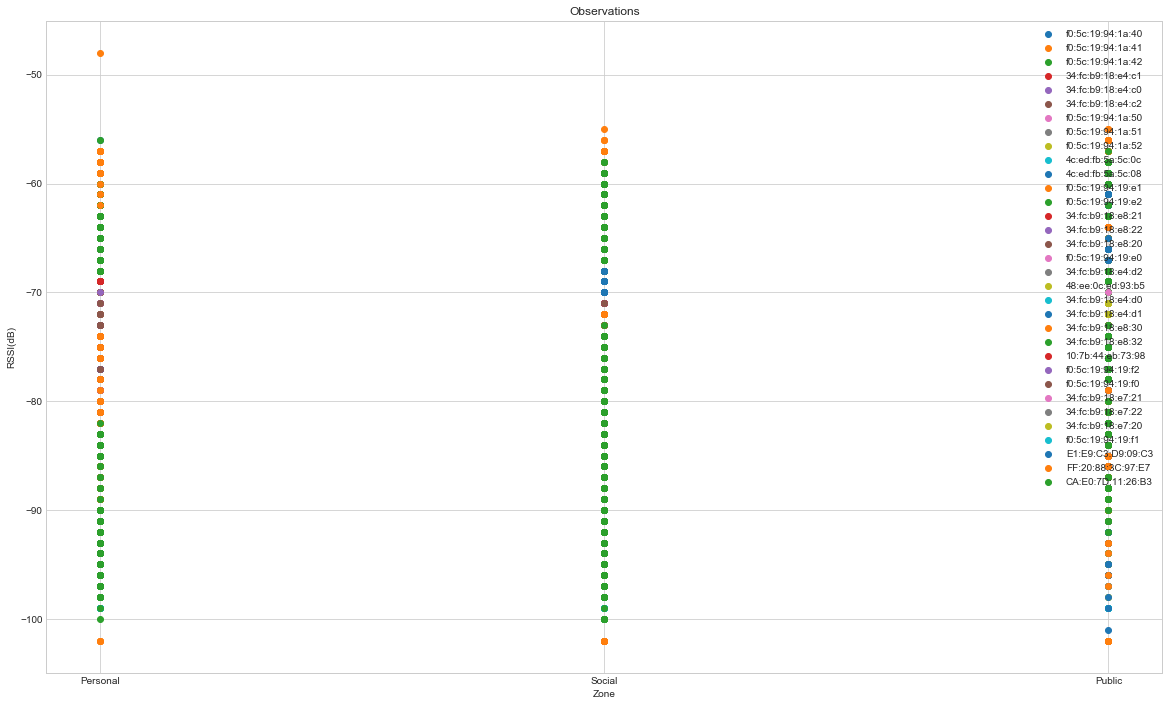

In [23]:
plt.figure(figsize=(20,12))
num = 0
palette = plt.get_cmap('Set1')
for x in X_train:
    num += 1
    plt.scatter(dataset['zone'],dataset[x],label=x,cmap='Sequential')
plt.title('Observations')
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [24]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [25]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed
train_Y = dataset['labels'].values.reshape(-1,1)

Previous Categorical Data


zone
0    Personal
1    Personal
2    Personal
3    Personal
4    Personal
..        ...
745  Personal
746  Personal
747  Personal
748  Personal
749  Personal

[750 rows x 1 columns]

After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Hyperparameters for tunning

In [26]:
#Preprocessing options
scaler = [StandardScaler(),MaxAbsScaler(),MinMaxScaler(),None]
# Batch size of samples
batch_size = [10, 20, 40, 60, 80, 100]
# Epochs 
epochs = [10, 50, 100]
# Optimization function
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# Learning Rate - only used with SGD optimizer
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# Momentum - only used with SGD optimizer
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# Activation Function
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# Number of neurons in a hidden layer
neurons = [100,300,400,500,600]

### Statistics Output Format
Structure of the statistical output of each call to the MLP Classification Function

In [29]:
def structure_data(data,precision,accuracy,f1score):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    precision = precision
    accuracy = accuracy
    f1score = f1score
    statistical_results = [mae,mse,rsme,precision,accuracy,f1score]
    return statistical_results

### Feature Selection
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([0.0416313 , 0.04698406, 0.03682389, 0.00378105, 0.00443519,
       0.00431967, 0.04240579, 0.04074746, 0.03821546, 0.0966529 ,
       0.02751157, 0.07916844, 0.03234622, 0.01096325, 0.00788036,
       0.00682131, 0.0129336 , 0.02349806, 0.0215149 , 0.02683922,
       0.00690025, 0.02232807, 0.03050444, 0.        , 0.03093765,
       0.00976327, 0.00193222, 0.00069464, 0.00098171, 0.0180967 ,
       0.07646259, 0.06219218, 0.13373256])

CA:E0:7D:11:26:B3    0.133733
4c:ed:fb:5a:5c:0c    0.096653
f0:5c:19:94:19:e1    0.079168
E1:E9:C3:D9:09:C3    0.076463
FF:20:88:3C:97:E7    0.062192
f0:5c:19:94:1a:41    0.046984
f0:5c:19:94:1a:50    0.042406
f0:5c:19:94:1a:40    0.041631
f0:5c:19:94:1a:51    0.040747
f0:5c:19:94:1a:52    0.038215
f0:5c:19:94:1a:42    0.036824
f0:5c:19:94:19:e2    0.032346
f0:5c:19:94:19:f2    0.030938
34:fc:b9:18:e8:32    0.030504
4c:ed:fb:5a:5c:08    0.027512
34:fc:b9:18:e4:d0    0.026839
34:fc:b9:18:e4:d2    0.023498
34:fc:b9:18:e8:30    0.022328
48:ee:0c:ed:93:b5    0.021515
f0:5c:19:94:19:f1    0.018097
f0:5c:19:94:19:e0    0.012934
34:fc:b9:18:e8:21    0.010963
f0:5c:19:94:19:f0    0.009763
34:fc:b9:18:e8:22    0.007880
34:fc:b9:18:e4:d1    0.006900
34:fc:b9:18:e8:20    0.006821
34:fc:b9:18:e4:c0    0.004435
34:fc:b9:18:e4:c2    0.004320
34:fc:b9:18:e4:c1    0.003781
34:fc:b9:18:e7:21    0.001932
34:fc:b9:18:e7:20    0.000982
34:fc:b9:18:e7:22    0.000695
10:7b:44:eb:73:98    0.000000
dtype: flo

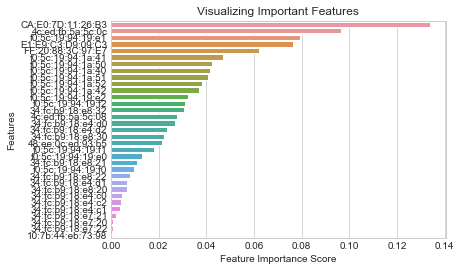

In [30]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestClassifier()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y.ravel())
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - MLP Classification Model

In [39]:
num_neurons_basic = 180
print("Default number of neurons: " + str(num_neurons_basic))
# Function to create model, required for KerasClassifier
def create_model(dim=3,num_neurons=num_neurons_basic,activation ='relu',optimizer = 'adam'):
    model = Sequential()
    model.add(Dense(num_neurons,input_dim=dim,activation=activation))
    model.add(Dense(num_neurons,activation=activation))
    model.add(Dense(4,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model
model = create_model()
display(model.summary())

Default number of neurons: 180
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 180)               720       
_________________________________________________________________
dense_20 (Dense)             (None, 180)               32580     
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 724       
Total params: 34,024
Trainable params: 34,024
Non-trainable params: 0
_________________________________________________________________


None

In [45]:
def compute_MLP_with_Classifier(flag=0,dim=2,
                              trainX_data = None, trainY_data = None,
                              testX_data = None,testY_data = None, 
                              scaler = None,cross_validation = None,batch_size=10,epochs=50,verbose=0,num_neurons_param=180,
                           optimizer_func='adam',activation_func='relu'):
    # Init the MLP Classification Estimator with the hyperparameterts
    keras_classification_model = KerasClassifier(build_fn=create_model,dim=dim,epochs=epochs,num_neurons=num_neurons_param,optimizer=optimizer_func,activation=activation_func,batch_size=batch_size,verbose=verbose)
    seed = 7
    np.random.seed(seed)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,keras_classification_model)
    else:
        # Use SKLearn MLP Classification Default Estimator
        main_estimator = keras_classification_model
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        # Compute Classification performance metrics
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    else:
        print("Cross Validation Activated. CV = " + str(cross_validation))
        # Fit and Predict the results of the testing data features using cross-validation
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        # Compute Classification performance metrics
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    error_dataframe = pd.DataFrame({'Actual': testY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
    return structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())

### Experiments

#### Check Training model with no cross validation
Use MLP Classifier to check the results on the training data alone

Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 450]]


precision  recall  f1-score  support
0                   1.0     1.0       1.0    150.0
1                   1.0     1.0       1.0    150.0
2                   1.0     1.0       1.0    450.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    750.0
weighted avg        1.0     1.0       1.0    750.0

Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
745       0          0
746       0          0
747       0          0
748       0          0
749       0          0

[750 rows x 2 columns]

Confusion Matrix:
[[ 69   0  81]
 [  0 103  47]
 [  9  17 424]]


precision    recall  f1-score     support
0              0.884615  0.460000  0.605263  150.000000
1              0.858333  0.686667  0.762963  150.000000
2              0.768116  0.942222  0.846307  450.000000
accuracy       0.794667  0.794667  0.794667    0.794667
macro avg      0.837022  0.696296  0.738178  750.000000
weighted avg   0.809459  0.794667  0.781430  750.000000

Actual  Predicted
0         0          2
1         0          0
2         0          2
3         0          2
4         0          0
..      ...        ...
745       0          0
746       0          0
747       0          0
748       0          0
749       0          0

[750 rows x 2 columns]

Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 450]]


precision  recall  f1-score  support
0                   1.0     1.0       1.0    150.0
1                   1.0     1.0       1.0    150.0
2                   1.0     1.0       1.0    450.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    750.0
weighted avg        1.0     1.0       1.0    750.0

Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
745       0          0
746       0          0
747       0          0
748       0          0
749       0          0

[750 rows x 2 columns]

mae       mse      rmse  precision  accuracy  f1-score  type
0  0.000000  0.000000  0.000000   1.000000  1.000000  1.000000  WiFi
2  0.000000  0.000000  0.000000   1.000000  1.000000  1.000000  Both
1  0.205333  0.205333  0.453137   0.825369  0.794667  0.754801   BLE

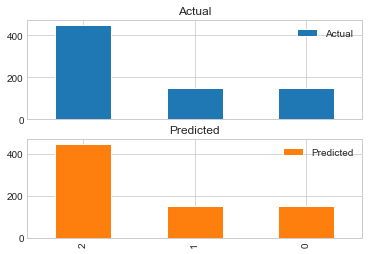

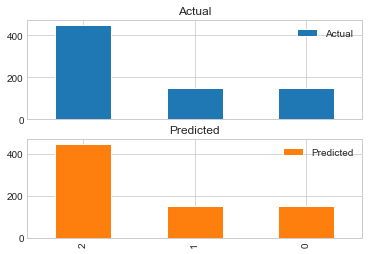

In [46]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)
    result = compute_MLP_with_Classifier(flag=1,dim=dim,trainX_data=trainX_data,trainY_data=train_Y.ravel(),
                                   testX_data=trainX_data,testY_data=train_Y.ravel(),
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

#### Experiment - MLP with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

Cross Validation Activated. CV = 2
Cross Validation Activated. CV = 3
Cross Validation Activated. CV = 4
Cross Validation Activated. CV = 5
Cross Validation Activated. CV = 6
Cross Validation Activated. CV = 7
Cross Validation Activated. CV = 8
Cross Validation Activated. CV = 9
Cross Validation Activated. CV = 10
Cross Validation Activated. CV = 2
Cross Validation Activated. CV = 3
Cross Validation Activated. CV = 4
Cross Validation Activated. CV = 5
Cross Validation Activated. CV = 6
Cross Validation Activated. CV = 7
Cross Validation Activated. CV = 8
Cross Validation Activated. CV = 9
Cross Validation Activated. CV = 10
Cross Validation Activated. CV = 2
Cross Validation Activated. CV = 3
Cross Validation Activated. CV = 4
Cross Validation Activated. CV = 5
Cross Validation Activated. CV = 6
Cross Validation Activated. CV = 7
Cross Validation Activated. CV = 8
Cross Validation Activated. CV = 9
Cross Validation Activated. CV = 10


mae       mse      rmse  precision  accuracy  f1-score  folds  type
24  0.392000  0.392000  0.626099   0.560008  0.608000  0.515663      8  Both
20  0.398667  0.398667  0.631401   0.549259  0.601333  0.510217      4  Both
25  0.388000  0.388000  0.622896   0.579375  0.612000  0.493478      9  Both
26  0.417333  0.417333  0.646013   0.523690  0.582667  0.485382     10  Both
15  0.448000  0.448000  0.669328   0.499920  0.552000  0.485234      8   BLE
7   0.430667  0.430667  0.656252   0.470388  0.569333  0.469014      9  WiFi
22  0.416000  0.416000  0.644981   0.516131  0.584000  0.438096      6  Both
16  0.470667  0.470667  0.686052   0.458891  0.529333  0.437281      9   BLE
23  0.438667  0.438667  0.662319   0.447355  0.561333  0.435865      7  Both
11  0.497333  0.497333  0.705219   0.443963  0.502667  0.435511      4   BLE
6   0.482667  0.482667  0.694742   0.432246  0.517333  0.431550      8  WiFi
2   0.492000  0.492000  0.701427   0.419774  0.508000  0.418215      4  WiFi
8   0.525333  0.525333  0.724799   0.402029  0.474667  0.400587     10  WiFi
5   0.473333  0.473333  0.687992   0.389041  0.526667  0.400534      7  WiFi
17  0.532000  0.532000  0.729383   0.399504  0.468000  0.393274     10   BLE
4   0.489333  0.489333  0.699524   0.379752  0.510667  0.386761      6  WiFi
14  0.545333  0.545333  0.738467   0.356918  0.454667  0.366587      7   BLE
12  0.574667  0.574667  0.758068   0.336082  0.425333  0.337810      5   BLE
13  0.561333  0.561333  0.749222   0.330534  0.438667  0.332964      6   BLE
9   0.512000  0.512000  0.715542   0.293700  0.488000  0.311115      2   BLE
3   0.562667  0.562667  0.750111   0.293815  0.437333  0.308068      5  WiFi
18  0.512000  0.512000  0.715542   0.273920  0.488000  0.300354      2  Both
0   0.561333  0.561333  0.749222   0.273890  0.438667  0.289903      2  WiFi
21  0.525333  0.525333  0.724799   0.258044  0.474667  0.288870      5  Both
10  0.574667  0.574667  0.758068   0.274524  0.425333  0.281350      3   BLE
19  0.642667  0.642667  0.801665   0.218006  0.357333  0.233135      3  Both
1   0.676000  0.676000  0.822192   0.228388  0.324000  0.228194      3  WiFi

Number of Folds:  8


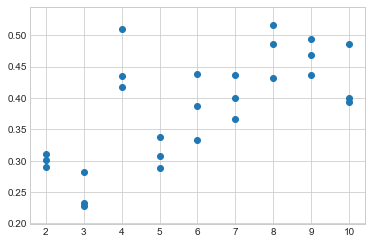

In [48]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)
    for cv in cross_validation_list:
        result = compute_MLP_with_Classifier(dim=dim,testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = cv)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

#### Experiment - MLP with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

mae       mse      rmse  precision  accuracy  f1-score  test_size  \
19  0.040000  0.040000  0.200000   0.961678  0.960000  0.956568        0.2   
1   0.060000  0.060000  0.244949   0.942343  0.940000  0.931916        0.2   
20  0.062222  0.062222  0.249444   0.950177  0.937778  0.931350        0.3   
21  0.063333  0.063333  0.251661   0.942593  0.936667  0.930822        0.4   
0   0.066667  0.066667  0.258199   0.933800  0.933333  0.928298        0.1   
18  0.066667  0.066667  0.258199   0.932583  0.933333  0.927711        0.1   
23  0.068889  0.068889  0.262467   0.934292  0.931111  0.925000        0.6   
22  0.074667  0.074667  0.273252   0.930728  0.925333  0.918309        0.5   
4   0.090667  0.090667  0.301109   0.909331  0.909333  0.899144        0.5   
3   0.090000  0.090000  0.300000   0.907378  0.910000  0.897894        0.4   
24  0.097143  0.097143  0.311677   0.900620  0.902857  0.893739        0.7   
2   0.093333  0.093333  0.305505   0.909121  0.906667  0.893681        0.3   
5   0.097778  0.097778  0.312694   0.901068  0.902222  0.889626        0.6   
25  0.113333  0.113333  0.336650   0.882643  0.886667  0.876822        0.8   
6   0.129524  0.129524  0.359894   0.863145  0.870476  0.854274        0.7   
7   0.158333  0.158333  0.397911   0.832654  0.841667  0.824161        0.8   
26  0.186667  0.186667  0.432049   0.831147  0.813333  0.781941        0.9   
9   0.213333  0.213333  0.461880   0.768678  0.786667  0.773822        0.1   
10  0.206667  0.206667  0.454606   0.824475  0.793333  0.762918        0.2   
12  0.233333  0.233333  0.483046   0.755504  0.766667  0.742180        0.4   
11  0.235556  0.235556  0.485341   0.752586  0.764444  0.736969        0.3   
14  0.264444  0.264444  0.514242   0.715742  0.735556  0.708861        0.6   
13  0.261333  0.261333  0.511208   0.728737  0.738667  0.701084        0.5   
8   0.244444  0.244444  0.494413   0.744127  0.755556  0.699825        0.9   
15  0.281905  0.281905  0.530947   0.693803  0.718095  0.692910        0.7   
16  0.298333  0.298333  0.546199   0.680804  0.701667  0.674400        0.8   
17  0.308148  0.308148  0.555111   0.676316  0.691852  0.616267        0.9   

    type  
19  Both  
1   WiFi  
20  Both  
21  Both  
0   WiFi  
18  Both  
23  Both  
22  Both  
4   WiFi  
3   WiFi  
24  Both  
2   WiFi  
5   WiFi  
25  Both  
6   WiFi  
7   WiFi  
26  Both  
9    BLE  
10   BLE  
12   BLE  
11   BLE  
14   BLE  
13   BLE  
8   WiFi  
15   BLE  
16   BLE  
17   BLE

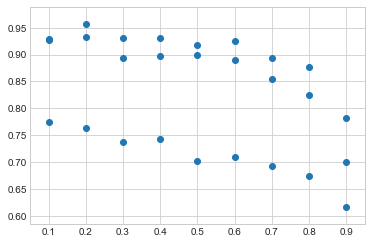

In [49]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns) 
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = size, random_state = 42,stratify=train_Y)
        result = compute_MLP_with_Classifier(dim=dim,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['test_size'],statistics['f1-score'])

#### Experiment - MLP with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [50]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns) 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    result = compute_MLP_with_Classifier(dim=dim,testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x0000025CA1D96C48>
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x0000025D5986BA48>
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x0000025D4A980748>


mae  mse  rmse  precision  accuracy  f1-score  type
0  1.0  1.0   1.0        0.0       0.0       0.0  WiFi
1  1.0  1.0   1.0        0.0       0.0       0.0   BLE
2  1.0  1.0   1.0        0.0       0.0       0.0  Both

#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using MLP

Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x0000025D256B09C8>
Cross Validation Activated. CV = 8
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x0000025D60907EC8>
Cross Validation Activated. CV = 8
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x0000025D738E2248>
Cross Validation Activated. CV = 8


mae       mse      rmse  precision  accuracy  f1-score  \
7  0.062222  0.062222  0.249444   0.950177  0.937778  0.931350   
1  0.093333  0.093333  0.305505   0.905936  0.906667  0.891969   
4  0.235556  0.235556  0.485341   0.752586  0.764444  0.736969   
8  0.392000  0.392000  0.626099   0.560008  0.608000  0.515663   
5  0.448000  0.448000  0.669328   0.499920  0.552000  0.485234   
2  0.482667  0.482667  0.694742   0.432169  0.517333  0.431487   
0  1.000000  1.000000  1.000000   0.000000  0.000000  0.000000   
3  1.000000  1.000000  1.000000   0.000000  0.000000  0.000000   
6  1.000000  1.000000  1.000000   0.000000  0.000000  0.000000   

              method  type  
7            HoldOut  Both  
1            HoldOut  WiFi  
4            HoldOut   BLE  
8  Stratified K-Fold  Both  
5  Stratified K-Fold   BLE  
2  Stratified K-Fold  WiFi  
0                LOO  WiFi  
3                LOO   BLE  
6                LOO  Both

Selected cross validation method:  HoldOut


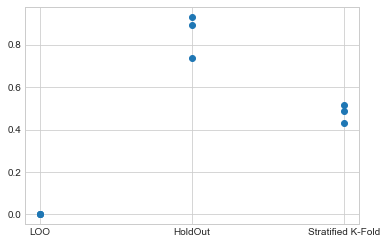

In [51]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns) 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
    holdout = compute_MLP_with_Classifier(dim=dim,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    loo = compute_MLP_with_Classifier(dim=dim,testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skfold = compute_MLP_with_Classifier(dim=dim,testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['method'],statistics['f1-score'],'o')
selected_method = "HoldOut"
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

In [52]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_MLP_with_Classifier(dim=dim,testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_MLP_with_Classifier(dim=dim,testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_MLP_with_Classifier(dim=dim,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['preprocessing'],statistics['f1-score'])
selected_preprocessing = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mae       mse      rmse  precision  accuracy  f1-score  \
8   0.062222  0.062222  0.249444   0.950177  0.937778  0.931350   
10  0.088889  0.088889  0.298142   0.916761  0.911111  0.902540   
0   0.093333  0.093333  0.305505   0.909121  0.906667  0.893681   
2   0.168889  0.168889  0.410961   0.820060  0.831111  0.811265   
4   0.231111  0.231111  0.480740   0.757056  0.768889  0.743166   
6   0.244444  0.244444  0.494413   0.765111  0.755556  0.712384   
9   0.257778  0.257778  0.507718   0.764917  0.742222  0.675891   
7   0.257778  0.257778  0.507718   0.803745  0.742222  0.673242   
5   0.315556  0.315556  0.561743   0.721021  0.684444  0.623120   
1   0.391111  0.391111  0.625389   0.467798  0.608889  0.366475   
3   0.400000  0.400000  0.632456   0.293333  0.600000  0.341667   
11  0.400000  0.400000  0.632456   0.293333  0.600000  0.341667   

     preprocessing                                  preprocessingFunc  type  
8   StandardScaler  StandardScaler(copy=True, with_mean=True, with...  Both  
10    MinMaxScaler      MinMaxScaler(copy=True, feature_range=(0, 1))  Both  
0   StandardScaler  StandardScaler(copy=True, with_mean=True, with...  WiFi  
2     MinMaxScaler      MinMaxScaler(copy=True, feature_range=(0, 1))  WiFi  
4   StandardScaler  StandardScaler(copy=True, with_mean=True, with...   BLE  
6     MinMaxScaler      MinMaxScaler(copy=True, feature_range=(0, 1))   BLE  
9     MaxAbsScaler                            MaxAbsScaler(copy=True)  Both  
7             None                                               None   BLE  
5     MaxAbsScaler                            MaxAbsScaler(copy=True)   BLE  
1     MaxAbsScaler                            MaxAbsScaler(copy=True)  WiFi  
3             None                                               None  WiFi  
11            None                                               None  Both

Selected Preprocessing:  StandardScaler


#### Experiment - Hyperparameter Optimization (Number of neurons per Layer)

In [56]:
statistical_cols = ['neurons','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    model = KerasClassifier(build_fn=create_model,dim=dim, epochs=15, batch_size=10, verbose=0)
    param_grid = dict(num_neurons=neurons)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_['num_neurons'])
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
selected_number_neurons = statistics.sort_values(by=['neurons'])['neurons'].head(1).values[0]
print("Selected Number Neurons: ",selected_number_neurons)

Best: 0.440000 using {'num_neurons': 100}
0.440000 (0.344093) with: {'num_neurons': 100}
0.160000 (0.233238) with: {'num_neurons': 300}
0.280000 (0.160000) with: {'num_neurons': 400}
0.360000 (0.344093) with: {'num_neurons': 500}
0.400000 (0.334664) with: {'num_neurons': 600}
Best: 0.505333 using {'num_neurons': 400}
0.482667 (0.268017) with: {'num_neurons': 100}
0.385333 (0.206576) with: {'num_neurons': 300}
0.505333 (0.224159) with: {'num_neurons': 400}
0.440000 (0.320000) with: {'num_neurons': 500}
0.240000 (0.195959) with: {'num_neurons': 600}
Best: 0.560000 using {'num_neurons': 100}
0.560000 (0.293939) with: {'num_neurons': 100}
0.320000 (0.299333) with: {'num_neurons': 300}
0.240000 (0.233238) with: {'num_neurons': 400}
0.320000 (0.370945) with: {'num_neurons': 500}
0.280000 (0.299333) with: {'num_neurons': 600}


neurons  type
0      100  WiFi
1      400   BLE
2      100  Both

Selected Number Neurons:  100


#### Experiment - Hyperparameter Optimization (Batch Size and Epochs)

In [57]:
statistical_cols = ['batch_size','epochs','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    model = KerasClassifier(build_fn=create_model,dim=dim, verbose=0)
    param_grid = dict(batch_size=batch_size, epochs=epochs)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_['batch_size'])
    result.append(grid_result.best_params_['epochs'])
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
selected_batch_size = statistics.sort_values(by=['batch_size'])['batch_size'].head(1).values[0]
print("Selected Batch Size: ",selected_batch_size)
selected_epochs = statistics.sort_values(by=['epochs'])['epochs'].head(1).values[0]
print("Selected Epochs: ",selected_epochs)

D:\Programs\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.526639 using {'batch_size': 100, 'epochs': 10}
0.351922 (0.383333) with: {'batch_size': 10, 'epochs': 10}
0.171585 (0.292022) with: {'batch_size': 10, 'epochs': 50}
0.338624 (0.368681) with: {'batch_size': 10, 'epochs': 100}
0.159574 (0.229649) with: {'batch_size': 20, 'epochs': 10}
0.254032 (0.430810) with: {'batch_size': 20, 'epochs': 50}
0.381177 (0.394965) with: {'batch_size': 20, 'epochs': 100}
0.359472 (0.348012) with: {'batch_size': 40, 'epochs': 10}
0.129032 (0.329364) with: {'batch_size': 40, 'epochs': 50}
0.291724 (0.343975) with: {'batch_size': 40, 'epochs': 100}
0.378089 (0.309667) with: {'batch_size': 60, 'epochs': 10}
0.131177 (0.235052) with: {'batch_size': 60, 'epochs': 50}
0.075841 (0.188759) with: {'batch_size': 60, 'epochs': 100}
0.405113 (0.426938) with: {'batch_size': 80, 'epochs': 10}
0.178191 (0.185771) with: {'batch_size': 80, 'epochs': 50}
0.320522 (0.352654) with: {'batch_size': 80, 'epochs': 100}
0.526639 (0.321907) with: {'batch_size': 100, 'epochs':

batch_size  epochs  type
0         100      10  WiFi
1         100     100   BLE
2          20      10  Both

Selected Batch Size:  20
Selected Epochs:  10


#### Experiment - Hyperparameter Optimization (Optimization Algorithm)

In [58]:
statistical_cols = ['optimization_algorithm','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    model = KerasClassifier(build_fn=create_model,dim=dim,epochs=50, batch_size=10, verbose=0)
    param_grid = dict(optimizer=optimizer)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_['optimizer'])
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
selected_optimization_algorithm = statistics.sort_values(by=['optimization_algorithm'])['optimization_algorithm'].head(1).values[0]
print("Selected Optimization Algorithm: ",selected_optimization_algorithm)

D:\Programs\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.432224 using {'optimizer': 'Adamax'}
0.391386 (0.359883) with: {'optimizer': 'SGD'}
0.275309 (0.367356) with: {'optimizer': 'RMSprop'}
0.258837 (0.364235) with: {'optimizer': 'Adagrad'}
0.373713 (0.413746) with: {'optimizer': 'Adadelta'}
0.218514 (0.335996) with: {'optimizer': 'Adam'}
0.432224 (0.359966) with: {'optimizer': 'Adamax'}
0.232756 (0.304719) with: {'optimizer': 'Nadam'}
Best: 0.614319 using {'optimizer': 'Adadelta'}
0.181280 (0.264263) with: {'optimizer': 'SGD'}
0.373713 (0.413746) with: {'optimizer': 'RMSprop'}
0.386496 (0.355916) with: {'optimizer': 'Adagrad'}
0.614319 (0.179430) with: {'optimizer': 'Adadelta'}
0.436070 (0.326910) with: {'optimizer': 'Adam'}
0.588624 (0.297635) with: {'optimizer': 'Adamax'}
0.426390 (0.339472) with: {'optimizer': 'Nadam'}
Best: 0.482241 using {'optimizer': 'Nadam'}
0.114791 (0.210225) with: {'optimizer': 'SGD'}
0.202128 (0.222134) with: {'optimizer': 'RMSprop'}
0.296071 (0.313728) with: {'optimizer': 'Adagrad'}
0.078500 (0.195785)

optimization_algorithm  type
0                 Adamax  WiFi
1               Adadelta   BLE
2                  Nadam  Both

Selected Optimization Algorithm:  Adadelta


#### Experiment - Hyperparameter Optimization (Learning Rate and Momentum)

In [59]:
from keras.optimizers import SGD
def create_model_SGD(dim=2,learn_rate=0.01, momentum=0):
    model = Sequential()
    model.add(Dense(num_neurons_basic,input_dim=dim,activation='relu'))
    model.add(Dense(num_neurons_basic,activation='relu'))
    model.add(Dense(4,activation='softmax'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [60]:
statistical_cols = ['learning_rate','momentum','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    model = KerasClassifier(build_fn=create_model_SGD,dim=dim,epochs=50, batch_size=10, verbose=0)
    param_grid = dict(learn_rate=learn_rate, momentum=momentum)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_['learn_rate'])
    result.append(grid_result.best_params_['momentum'])
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
selected_learning_rate = statistics.sort_values(by=['learning_rate'])['learning_rate'].head(1).values[0]
print("Selected Learing Rate: ",selected_learning_rate)
selected_momentum = statistics.sort_values(by=['momentum'])['momentum'].head(1).values[0]
print("Selected Momentum: ",selected_momentum)

D:\Programs\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.557224 using {'learn_rate': 0.01, 'momentum': 0.6}
0.114791 (0.151759) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.444578 (0.400811) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.280113 (0.378060) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.029255 (0.077402) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.501373 (0.405304) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.540323 (0.373747) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.231812 (0.247467) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.309369 (0.352679) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.234900 (0.358745) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.557224 (0.361794) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.200326 (0.269474) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.105096 (0.192830) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.125858 (0.229221) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.309369 (0.321278) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.314259 (0.326823) with: {'learn_rate': 

learning_rate  momentum  type
0          0.010       0.6  WiFi
1          0.300       0.6   BLE
2          0.001       0.2  Both

Selected Learing Rate:  0.001
Selected Momentum:  0.2


#### Experiment - Hyperparameter Optimization (Activation Function)

In [61]:
statistical_cols = ['activation_function','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    model = KerasClassifier(build_fn=create_model,dim=dim,epochs=50,batch_size=10,verbose=0)
    param_grid = dict(activation=activation)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_['activation'])
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
selected_activation_function = statistics.sort_values(by=['activation_function'])['activation_function'].head(1).values[0]
print("Selected Activation Function: ",selected_activation_function)

D:\Programs\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.599262 using {'activation': 'softmax'}
0.599262 (0.315599) with: {'activation': 'softmax'}
0.171585 (0.220730) with: {'activation': 'softplus'}
0.597932 (0.313925) with: {'activation': 'softsign'}
0.187543 (0.242793) with: {'activation': 'relu'}
0.599262 (0.315599) with: {'activation': 'tanh'}
0.599262 (0.315599) with: {'activation': 'sigmoid'}
0.599262 (0.315599) with: {'activation': 'hard_sigmoid'}
0.040323 (0.106684) with: {'activation': 'linear'}
Best: 0.752231 using {'activation': 'relu'}
0.475635 (0.196787) with: {'activation': 'softmax'}
0.659288 (0.271058) with: {'activation': 'softplus'}
0.633894 (0.286886) with: {'activation': 'softsign'}
0.752231 (0.193179) with: {'activation': 'relu'}
0.672915 (0.205796) with: {'activation': 'tanh'}
0.610015 (0.272994) with: {'activation': 'sigmoid'}
0.633951 (0.274833) with: {'activation': 'hard_sigmoid'}
0.239791 (0.353372) with: {'activation': 'linear'}
Best: 0.599262 using {'activation': 'softmax'}
0.599262 (0.315599) with: {'ac

activation_function  type
0             softmax  WiFi
1                relu   BLE
2             softmax  Both

Selected Activation Function:  relu


#### Run RandomSearchCV for parameter tunning

In [65]:
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)
    model = KerasClassifier(build_fn=create_model,dim=dim,epochs=25,batch_size=10,verbose=0)
    print("# Tuning hyper-parameters for %s" % feature)
    param_grid = dict(activation=activation,optimizer=optimizer,num_neurons=neurons)
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,n_iter=25, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_)
    result.append(feature)
    results.append(result)
gridcv_results = pd.DataFrame(results)
display(gridcv_results)

# Tuning hyper-parameters for WiFi
Best: 0.599262 using {'optimizer': 'Adadelta', 'num_neurons': 300, 'activation': 'hard_sigmoid'}
0.551390 (0.286408) with: {'optimizer': 'Adadelta', 'num_neurons': 300, 'activation': 'sigmoid'}
0.253517 (0.266665) with: {'optimizer': 'SGD', 'num_neurons': 500, 'activation': 'tanh'}
0.472918 (0.329160) with: {'optimizer': 'Adadelta', 'num_neurons': 500, 'activation': 'tanh'}
0.599262 (0.315599) with: {'optimizer': 'Adadelta', 'num_neurons': 300, 'activation': 'hard_sigmoid'}
0.237560 (0.263515) with: {'optimizer': 'Adadelta', 'num_neurons': 300, 'activation': 'relu'}
0.599262 (0.315599) with: {'optimizer': 'Adam', 'num_neurons': 400, 'activation': 'tanh'}
0.555251 (0.283364) with: {'optimizer': 'Adam', 'num_neurons': 100, 'activation': 'softsign'}
0.381692 (0.387655) with: {'optimizer': 'Adadelta', 'num_neurons': 400, 'activation': 'relu'}
0.378517 (0.342207) with: {'optimizer': 'Adagrad', 'num_neurons': 400, 'activation': 'linear'}
0.599262 (0.315599)

0     1
0  {'optimizer': 'Adadelta', 'num_neurons': 300, ...  WiFi
1  {'optimizer': 'Nadam', 'num_neurons': 100, 'ac...   BLE
2  {'optimizer': 'RMSprop', 'num_neurons': 400, '...  Both

### Best Parameters
Display the best parameters tunned throughout the experiments

In [66]:
conclusion_cols=['Cross_Validation','Number of Neurons','Activation Function','Batch Size','Epochs','Optimizer','Learning Rate',
                 'Momentum','Preprocessing']
conclusion_list = [selected_method,selected_number_neurons,selected_activation_function,selected_batch_size,selected_epochs,
                   selected_optimization_algorithm,selected_learning_rate,selected_momentum,selected_preprocessing]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

Cross_Validation  Number of Neurons Activation Function  Batch Size  Epochs  \
0          HoldOut                100                relu          20      10   

  Optimizer  Learning Rate  Momentum   Preprocessing  
0  Adadelta          0.001       0.2  StandardScaler

### Best Results
Compute MLP with the best parameters

Confusion Matrix:
[[ 36   3   6]
 [  0  39   6]
 [  4   4 127]]


precision    recall  f1-score     support
0              0.900000  0.800000  0.847059   45.000000
1              0.847826  0.866667  0.857143   45.000000
2              0.913669  0.940741  0.927007  135.000000
accuracy       0.897778  0.897778  0.897778    0.897778
macro avg      0.887165  0.869136  0.877070  225.000000
weighted avg   0.897767  0.897778  0.897045  225.000000

Actual  Predicted
0         2          2
1         2          2
2         0          0
3         2          2
4         2          2
..      ...        ...
220       1          1
221       1          1
222       1          1
223       2          2
224       2          2

[225 rows x 2 columns]

Confusion Matrix:
[[ 20   0  25]
 [  0  27  18]
 [  7   7 121]]


precision    recall  f1-score     support
0              0.740741  0.444444  0.555556   45.000000
1              0.794118  0.600000  0.683544   45.000000
2              0.737805  0.896296  0.809365  135.000000
accuracy       0.746667  0.746667  0.746667    0.746667
macro avg      0.757554  0.646914  0.682821  225.000000
weighted avg   0.749655  0.746667  0.733439  225.000000

Actual  Predicted
0         2          2
1         2          2
2         0          2
3         2          2
4         2          2
..      ...        ...
220       1          1
221       1          2
222       1          1
223       2          2
224       2          2

[225 rows x 2 columns]

Confusion Matrix:
[[ 38   0   7]
 [  0  41   4]
 [  2   3 130]]


precision    recall  f1-score     support
0              0.950000  0.844444  0.894118   45.000000
1              0.931818  0.911111  0.921348   45.000000
2              0.921986  0.962963  0.942029  135.000000
accuracy       0.928889  0.928889  0.928889    0.928889
macro avg      0.934601  0.906173  0.919165  225.000000
weighted avg   0.929555  0.928889  0.928311  225.000000

Actual  Predicted
0         2          2
1         2          2
2         0          0
3         2          2
4         2          2
..      ...        ...
220       1          1
221       1          1
222       1          1
223       2          2
224       2          2

[225 rows x 2 columns]

mae       mse      rmse  precision  accuracy  f1-score  type
2  0.071111  0.071111  0.266667   0.932808  0.928889  0.922310  Both
0  0.102222  0.102222  0.319722   0.890701  0.897778  0.883850  WiFi
1  0.253333  0.253333  0.503322   0.754423  0.746667  0.701899   BLE

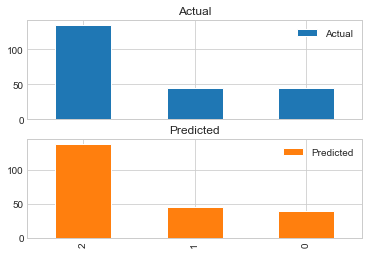

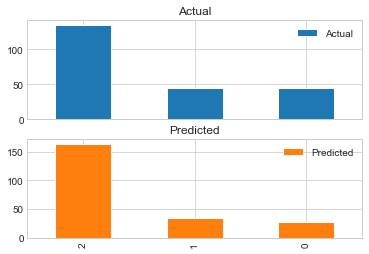

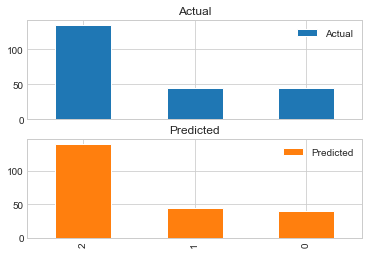

In [67]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns) 
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
        result = compute_MLP_with_Classifier(flag=1,dim=dim,testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                            num_neurons_param=selected_number_neurons,activation_func=selected_activation_function,
                                    batch_size=selected_batch_size,optimizer_func=selected_optimization_algorithm)  
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Classifier(flag=1,dim=dim,testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                             cross_validation = selected_fold,
                            num_neurons_param=selected_number_neurons,activation_func=selected_activation_function,
                                    batch_size=selected_batch_size,optimizer_func=selected_optimization_algorithm)  
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
        result = compute_MLP_with_Classifier(flag=1,dim=dim,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),num_neurons_param=selected_number_neurons,activation_func=selected_activation_function,
                                    batch_size=selected_batch_size,optimizer_func=selected_optimization_algorithm)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))